## Page View vis project


In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [37]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col=["date"])
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [38]:
# Clean data
df  = df[
    (df["value"] >= df["value"].quantile(0.025)) &
    (df["value"] <= df["value"].quantile(0.975))
]
    

df.shape

(1238, 1)

Text(0.5, 0, 'Date')

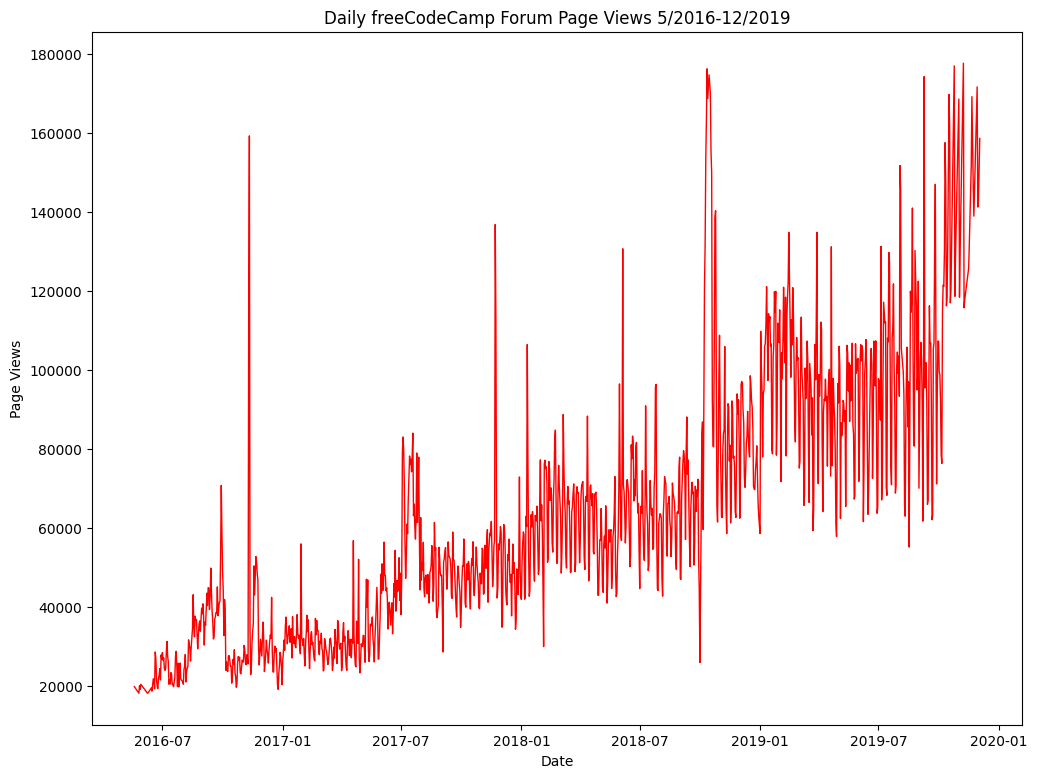

In [39]:
 # Draw line plot
 fig, ax =plt.subplots(figsize=(12,9))
 ax.plot(df.index, df["value"], "r", linewidth = 1)
 
 ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
 ax.set_ylabel ('Page Views')
 ax.set_xlabel('Date')
 #or this method
#df.plot(figsize=(12,9),color="red", xlabel='Date', 
 #       ylabel='Page Views', title = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

In [40]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar["month"] = df_bar.index.month
df_bar["year"] = df_bar.index.year

df_bar = df_bar.groupby(["year", "month"])["value"].mean()

df_bar = df_bar.unstack()

df_bar.head()


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


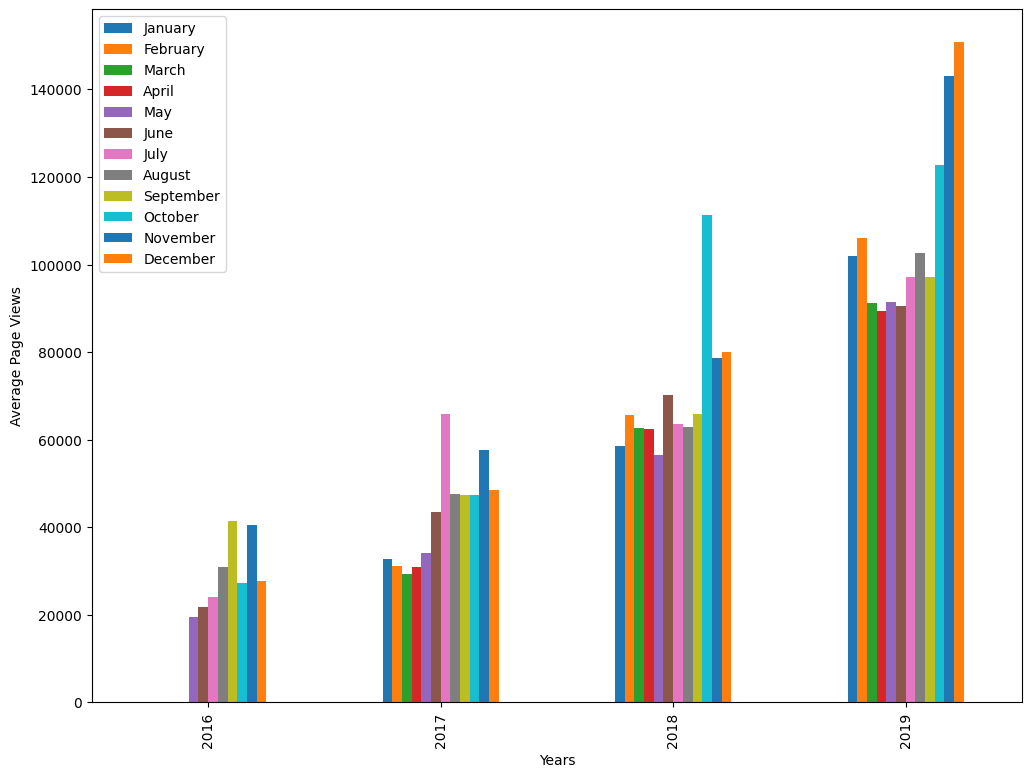

In [61]:
#drawing the bar plot

fig = df_bar.plot.bar(figsize=(12,9), xlabel="Years", ylabel="Average Page Views").figure
plt.legend(["January", "February", "March", "April","May","June","July","August","September","October","November", "December"])

In [44]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0, 0.5, 'Page Views')

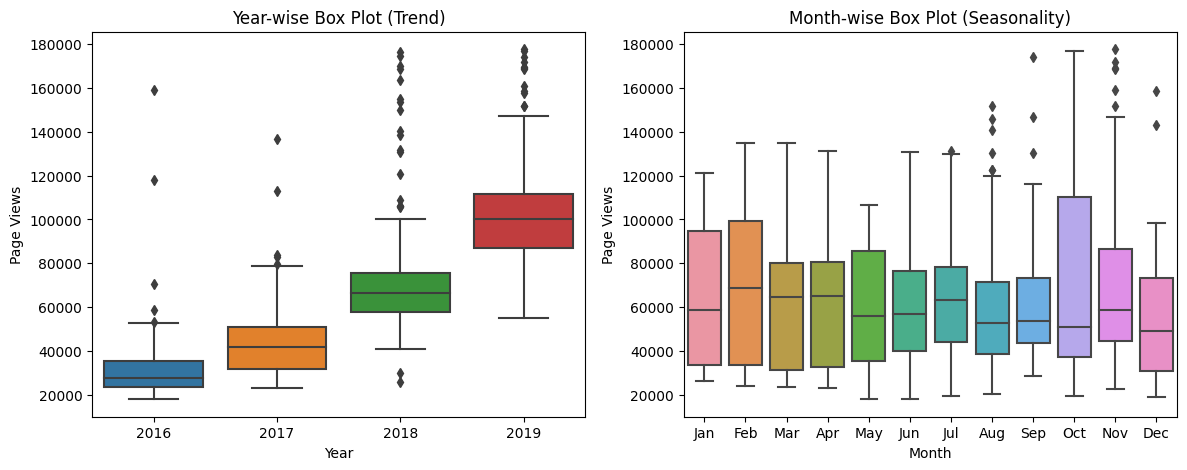

In [60]:
# Draw box plots (using Seaborn)

df_box["month_sorted"] = df_box["date"].dt.month #convert each date into date and extract the month 
df_box = df_box.sort_values("month_sorted")
#drawing two plots in same figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5)) #axes means we want multiple axes
axes[0] = sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
axes[1] = sns.boxplot(data=df_box, x="month", y="value", ax=axes[1]) 
#labels and title
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")
